In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl, plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [5]:
#import dados
import yfinance as yf

df_analise = yf.download("AAPL",
                        start="2010-01-01",
                        end="2023-01-01")["Adj Close"]
df_analise = pd.DataFrame(df_analise)
df_analise

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2010-01-04,6.479000
2010-01-05,6.490200
2010-01-06,6.386964
2010-01-07,6.375158
2010-01-08,6.417542
...,...
2022-12-23,131.127060
2022-12-27,129.307251
2022-12-28,125.339417


In [6]:
df_analise['returns'] = df_analise['Adj Close'].pct_change()

In [7]:
#df_analise.set_index('time', inplace=True)
df_analise['Sma_7'] = ta.sma(df_analise['Adj Close'], length=7)
df_analise['Sma_21'] = ta.sma(df_analise['Adj Close'], length=21)
df_analise['Sma_50'] = ta.sma(df_analise['Adj Close'], length=50)

df_analise['Sma_7_return'] = ta.sma(df_analise['returns'], length=7)
df_analise['Sma_21_return'] = ta.sma(df_analise['returns'], length=21)
df_analise['Sma_50_return'] = ta.sma(df_analise['returns'], length=50)

df_analise

,Adj Close,returns,Sma_7,Sma_21,Sma_50,Sma_7_return,Sma_21_return,Sma_50_return
Date,,,,,,,,
2010-01-04,6.479000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.490200,0.001729,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.386964,-0.015906,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.375158,-0.001848,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.417542,0.006648,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,-0.002798,132.860227,140.231886,143.258232,-0.011519,-0.006254,-0.001253
2022-12-27,129.307251,-0.013878,131.941084,139.375721,143.096718,-0.006808,-0.005982,-0.000886
2022-12-28,125.339417,-0.030685,130.737813,138.514818,142.775829,-0.009109,-0.006192,-0.002082


In [8]:
df_analise.dropna(inplace=True)

In [9]:
#inicialmente teste com Sma
df_analise['Dist_7'] = df_analise['Adj Close']-df_analise['Sma_7'] 
df_analise['Dist_21'] = df_analise['Adj Close']-df_analise['Sma_21']
df_analise['Dist_50'] = df_analise['Adj Close']-df_analise['Sma_50']

df_analise['Dist_7_return'] = df_analise['returns']-df_analise['Sma_7_return'] 
df_analise['Dist_21_return'] = df_analise['returns']-df_analise['Sma_21_return']
df_analise['Dist_50_return'] = df_analise['returns']-df_analise['Sma_50_return']
df_analise

,Adj Close,returns,Sma_7,Sma_21,Sma_50,Sma_7_return,Sma_21_return,Sma_50_return,Dist_7,Dist_21,Dist_50,Dist_7_return,Dist_21_return,Dist_50_return
Date,,,,,,,,,,,,,,
2010-03-17,6.785072,-0.001470,6.800338,6.429954,6.271607,0.003291,0.004702,0.001089,-0.015266,0.355118,0.513465,-0.004761,-0.006173,-0.002559
2010-03-18,6.801116,0.002365,6.807388,6.461814,6.277825,0.001059,0.005014,0.001102,-0.006271,0.339303,0.523291,0.001306,-0.002649,0.001263
2010-03-19,6.728457,-0.010683,6.796186,6.489666,6.284655,-0.001633,0.004416,0.001206,-0.067729,0.238791,0.443802,-0.009050,-0.015099,-0.011890
2010-03-22,6.804143,0.011249,6.792942,6.522939,6.293235,-0.000445,0.005247,0.001468,0.011201,0.281204,0.510908,0.011694,0.006001,0.009780
2010-03-23,6.913436,0.016063,6.800554,6.563218,6.303153,0.001152,0.006307,0.001656,0.112882,0.350218,0.610283,0.014910,0.009755,0.014406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,-0.002798,132.860227,140.231886,143.258232,-0.011519,-0.006254,-0.001253,-1.733167,-9.104826,-12.131172,0.008721,0.003456,-0.001545
2022-12-27,129.307251,-0.013878,131.941084,139.375721,143.096718,-0.006808,-0.005982,-0.000886,-2.633833,-10.068470,-13.789467,-0.007070,-0.007897,-0.012993
2022-12-28,125.339417,-0.030685,130.737813,138.514818,142.775829,-0.009109,-0.006192,-0.002082,-5.398396,-13.175401,-17.436412,-0.021576,-0.024493,-0.028603


In [16]:
def percentil(data, up=95, down=5):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

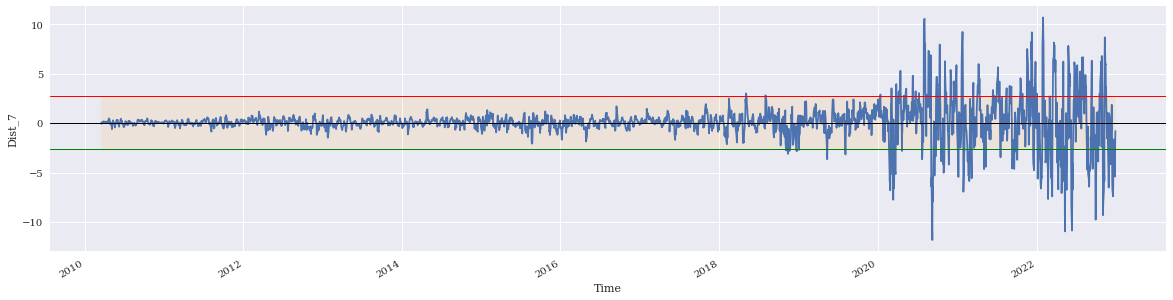

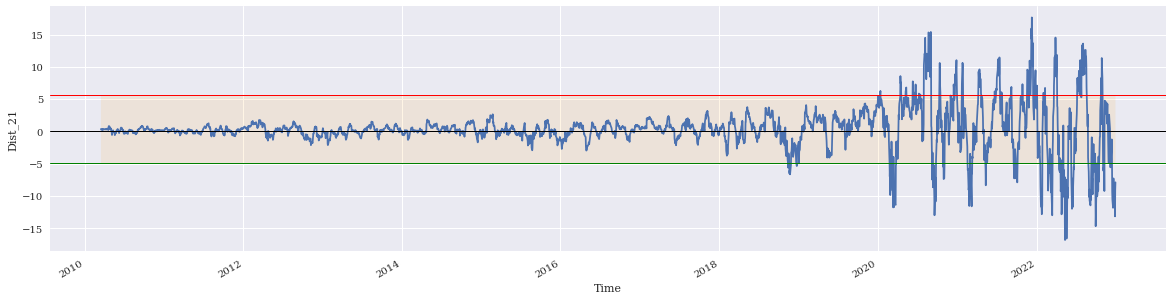

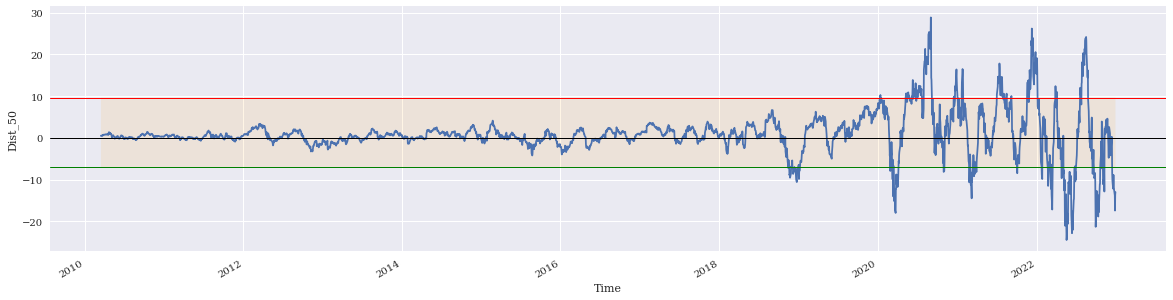

In [17]:
plt.rcParams['figure.figsize'] = (20,5)

per_dist1k = percentil(df_analise['Dist_7'], up=95, down=5)
ax = df_analise['Dist_7'].plot()
ax.fill_between(df_analise.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_7')
plt.show()

per_dist5k = percentil(df_analise['Dist_21'], up=95, down=5)
ax = df_analise['Dist_21'].plot()
ax.fill_between(df_analise.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_21')
plt.show()

per_dist10k = percentil(df_analise['Dist_50'], up=95, down=5)
ax = df_analise['Dist_50'].plot()
ax.fill_between(df_analise.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_50')
plt.show()

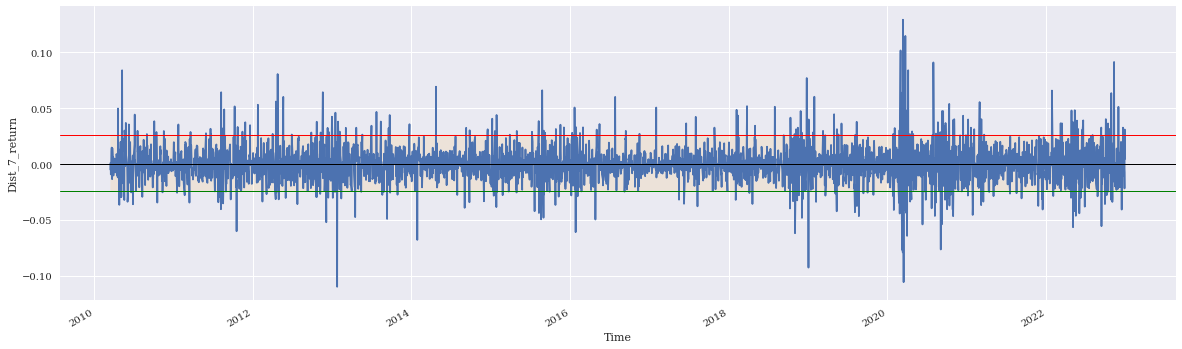

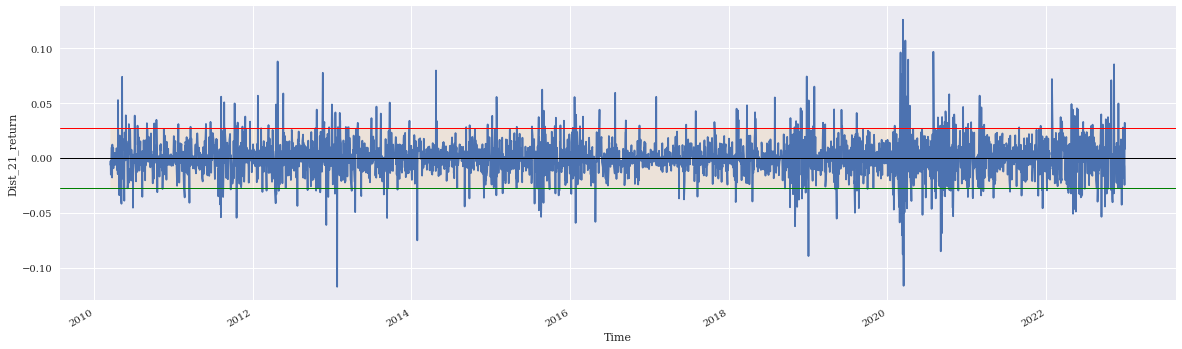

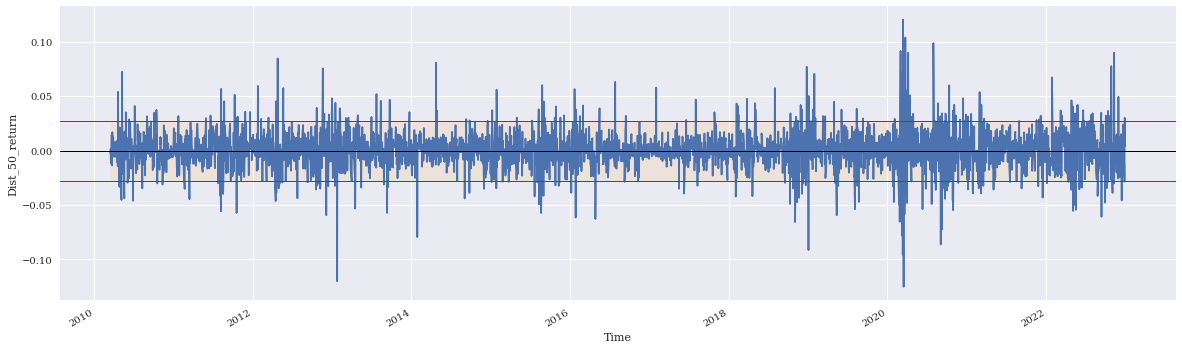

In [18]:
plt.rcParams['figure.figsize'] = (20,6)

per_dist1k = percentil(df_analise['Dist_7_return'], up=95, down=5)
ax = df_analise['Dist_7_return'].plot()
ax.fill_between(df_analise.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_7_return')
plt.show()

per_dist5k = percentil(df_analise['Dist_21_return'], up=95, down=5)
ax = df_analise['Dist_21_return'].plot()
ax.fill_between(df_analise.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_21_return')
plt.show()

per_dist10k = percentil(df_analise['Dist_50_return'], up=95, down=5)
ax = df_analise['Dist_50_return'].plot()
ax.fill_between(df_analise.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_50_return')
plt.show()

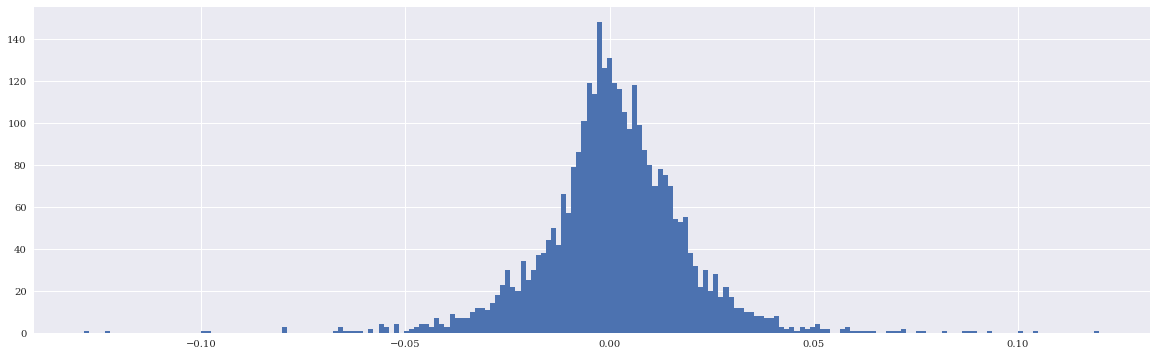

In [20]:
df_analise['returns'].hist(bins=200);